# Project: Wrangling and Analyze Data

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import requests 
import tweepy 
from tweepy import OAuthHandler 
import json
from timeit import default_timer as timer
import re
%matplotlib inline

## Data Gathering

>twitter-archive-enhanced

In [4]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

> image_predictions.tsv

In [50]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)

image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

> API request

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

> tweet.json

In [7]:
twitter_api = pd.read_json("tweet_json.txt", lines=True)[['id', 'retweet_count', 'favorite_count']].rename(columns={'id':'tweet_id'})

## Assessing Data

> Visual Assessment

In [8]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [9]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
twitter_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


> Programmatic Assessment

In [11]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [12]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [16]:
twitter_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
> (in `image_prediction.csv`)
1. Row number 106 contains a predictions that exceed 1 which is the limit.

2. The float numbers in (`p1_conf`, `p2_conf`, `p3_conf`) don't have a constant length.

3. `jpg_url` contains duplicates.

> (in `twitter_arhive_enhanced.csv`)
4. `expanded_urls` have some Nan values (tweets that don't have images).

5. `source` should contain the text of the source not the whole anchor tag.

6. `timestamp` doesn't a datetime object.

7. Outliers in `rating_numerator`, `rating_denominator` that exceed the average. 

8. `name` contains some invalid names like: 'a', 'an', 'None'.

### Tidiness issues
1. Each column (`p1`, `p2`, `p3`) repeated in different columns with a different attribute (In `image_predection.csv`).

2. Each column (`doggo`, `floofer`, `pupper`, `puppo`) could be melt in a one column to not repeat the same category in different column (In `twitter_archive_enhanced.csv`).

## Cleaning Data

> Removing retweets and copy the original dataframes.

In [17]:
image_prediction_copy = image_prediction.copy()
twitter_api_copy = twitter_api.copy()
twitter_archive_enhanced_copy = twitter_archive_enhanced[twitter_archive_enhanced['retweeted_status_id'].isna()].copy()
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy[~(twitter_archive_enhanced_copy['expanded_urls'].isna())]

### **Quality**

### Issue #1: Row number 106 contains a predictions that exceed 1 which is the limit. (Accuracy)

#### Define: Drop this row.

#### Code

In [18]:
image_prediction_copy.drop(image_prediction_copy[(image_prediction['p1_conf']+image_prediction['p2_conf']+image_prediction['p3_conf'])>1].index, inplace=True)

#### Test

In [19]:
assert image_prediction_copy[image_prediction_copy[(image_prediction['p1_conf']+image_prediction['p2_conf']+image_prediction['p3_conf'])>1]].count().sum() == 0

/tmp/ipykernel_14170/1603486127.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  assert image_prediction_copy[image_prediction_copy[(image_prediction['p1_conf']+image_prediction['p2_conf']+image_prediction['p3_conf'])>1]].count().sum() == 0


### Issue #2: the float numbers in (`p1_conf`, `p2_conf`, `p3_conf`) don't have a constant length. (Consistency)



#### Define: Round each float value to only 6 digits after the decimal point.

#### Code

In [20]:
list_of_predictions = ['p1_conf', 'p2_conf', 'p3_conf']
for i in list_of_predictions:
    image_prediction_copy[i] = image_prediction_copy[i].round(6)

#### Test

In [21]:
assert len(image_prediction_copy[(image_prediction_copy['p1_conf'] != image_prediction_copy['p1_conf'].round(6)) | (image_prediction_copy['p2_conf'] != image_prediction_copy['p2_conf'].round(6)) | (image_prediction_copy['p3_conf'] != image_prediction_copy['p3_conf'].round(6))]) == 0

### Issue #3: `jpg_url` column contains duplicates. (Uniqueness)

#### Define: Drop duplicates.

#### Code

In [22]:
image_prediction_copy = image_prediction_copy[~image_prediction_copy['jpg_url'].duplicated()]

#### Test

In [23]:
assert image_prediction_copy['jpg_url'].duplicated().sum() == 0

### Issue #4: `expanded_urls` have some Nan values (tweets that don't have images). (Completeness)

#### Define: Drop the rows that have Nan values.

#### Code

In [24]:
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy[~(twitter_archive_enhanced_copy['expanded_urls'].isna())]

#### Test

In [25]:
assert twitter_archive_enhanced_copy['expanded_urls'].isna().sum() == 0

### Issue #5: `source` should contain the text of the source not the whole anchor tag. (Accuracy)

#### Define: Save only the text in the href attribute in the anchor tag.

#### Code

In [26]:
twitter_archive_enhanced_copy['source'] = twitter_archive_enhanced_copy['source'].apply(lambda x: re.findall(r'<a[^>]*>(.*?)<\/a>', x)[0])

#### Test

In [27]:
twitter_archive_enhanced_copy['source'].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

### Issue #6: `timestamp` doesn't a datetime object. (Accuracy)

#### Define: Change the `timestamp` datatype.

#### Code

In [28]:
twitter_archive_enhanced_copy['timestamp'] = pd.to_datetime(twitter_archive_enhanced_copy['timestamp'])

#### Test

In [29]:
twitter_archive_enhanced_copy['timestamp'].info()

<class 'pandas.core.series.Series'>
Index: 2117 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2117 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 33.1 KB


### Issue #7: Outliers in `rating_numerator`, `rating_denominator` that exceed the average. (Accuracy)

#### Define: 
* Replace the outliers that detected with the IQR-outliers-detection approach in `rating_numerator` with the mean of normal range.
* Replace the outliers that detected with the Z-score approach in `rating_denominator` with the mean of normal range.

#### Code

In [30]:
numerator_q1 = np.percentile(twitter_archive_enhanced_copy['rating_numerator'],25)
numerator_q3 = np.percentile(twitter_archive_enhanced_copy['rating_numerator'],75)
numerator_IQR = numerator_q3-numerator_q1
denominator_mean = twitter_archive_enhanced_copy['rating_denominator'].mean()
denominator_std = twitter_archive_enhanced_copy['rating_denominator'].std()
normal_range_numerator = twitter_archive_enhanced_copy[((twitter_archive_enhanced_copy['rating_numerator'] > (numerator_q1 - (1.5*numerator_IQR))) & (twitter_archive_enhanced_copy['rating_numerator'] < (numerator_q3 + (1.5*numerator_IQR))))]
normal_range_denominator = twitter_archive_enhanced_copy[((twitter_archive_enhanced_copy['rating_denominator'] > (denominator_mean - (1.5*denominator_std))) & (twitter_archive_enhanced_copy['rating_denominator'] < (denominator_mean + (1.5*denominator_std))))]
twitter_archive_enhanced_copy['rating_numerator'][~((twitter_archive_enhanced_copy['rating_numerator'] > (numerator_q1 - (1.5*numerator_IQR))) & (twitter_archive_enhanced_copy['rating_numerator'] < (numerator_q3 + (1.5*numerator_IQR))))] = int(normal_range_numerator['rating_numerator'].mean())
twitter_archive_enhanced_copy['rating_denominator'][~((twitter_archive_enhanced_copy['rating_denominator'] > (denominator_mean - (1.5*denominator_std))) & (twitter_archive_enhanced_copy['rating_denominator'] < (denominator_mean + (1.5*denominator_std))))] = int(normal_range_denominator['rating_denominator'].mean())

/tmp/ipykernel_14170/3853131892.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  twitter_archive_enhanced_copy['rating_numerator'][~((twitter_archive_enhanced_copy['rating_numerator'] > (numerator_q1 - (1.5*numerator_IQR))) & (twitter_arc

#### Test

In [31]:
twitter_archive_enhanced_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.117000e+03,2.300000e+01,2.300000e+01,0.0,0.0,2117.000000,2117.000000
mean,7.363263e+17,6.978112e+17,4.196984e+09,NaN,NaN,11.076051,10.000472
std,6.706417e+16,4.359384e+16,0.000000e+00,NaN,NaN,1.366414,0.287581
min,6.660209e+17,6.671522e+17,4.196984e+09,NaN,NaN,8.000000,2.000000
25%,6.766175e+17,6.732411e+17,4.196984e+09,NaN,NaN,10.000000,10.000000
50%,7.094095e+17,6.757073e+17,4.196984e+09,NaN,NaN,11.000000,10.000000
75%,7.873224e+17,7.031489e+17,4.196984e+09,NaN,NaN,12.000000,10.000000
max,8.924206e+17,8.558181e+17,4.196984e+09,NaN,NaN,14.000000,20.000000


### Issue #8: `name` contains some invalid names like: 'a', 'an', 'the' ,'Nan'. (Validity and Completeness)

#### Define: Remove unvalid names.

#### Code

In [32]:
list_of_unvalid_names = ['a', 'an', 'the']
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy[~((twitter_archive_enhanced_copy['name'].isin(list_of_unvalid_names)) | (twitter_archive_enhanced_copy['name'].isna()))]

#### Test

In [33]:
assert len(twitter_archive_enhanced_copy[twitter_archive_enhanced_copy['name'] == 'a']) == 0

### **Tidiness**

### Issue #1: Each column (`p1`, `p2`, `p3`) repeated in different columns with a different attribute (In `image_predection.csv`).

#### Define: Make a column for `prediction_level`, `prediction`, `confidence`, `is_dog_breed`.

#### Code

In [34]:
image_prediction_copy_part1 = image_prediction_copy.melt(id_vars=['tweet_id', 'jpg_url', 'img_num'], value_vars=['p1', 'p2', 'p3'], var_name='prediction_level', value_name='prediction')
image_prediction_copy_part2 = image_prediction_copy.melt(id_vars=['tweet_id'], value_vars=['p1_conf', 'p2_conf', 'p3_conf'], var_name='confidence_level', value_name='confidence')
image_prediction_copy_part3 = image_prediction_copy.melt(id_vars=['tweet_id'], value_vars=['p1_dog', 'p2_dog', 'p3_dog'], var_name='is_dog_breed_level', value_name='is_dog_breed')
image_prediction_copy = pd.concat([image_prediction_copy_part1, image_prediction_copy_part2[['confidence']],  image_prediction_copy_part3[['is_dog_breed']]], axis=1)

#### Test

In [35]:
image_prediction_copy.sample(10)

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,is_dog_breed
3760,833124694597443584,https://pbs.twimg.com/media/C4_ad1IUoAEspsk.jpg,3,p2,kelpie,0.106102,True
5164,731285275100512256,https://pbs.twimg.com/media/CiYME3tVAAENz99.jpg,1,p3,Chihuahua,0.002231,True
5423,771380798096281600,https://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg,1,p3,English_springer,0.012693,True
3222,743510151680958465,https://pbs.twimg.com/ext_tw_video_thumb/74350...,1,p2,tub,0.020405,False
935,703425003149250560,https://pbs.twimg.com/media/CcMRSwUW8AAxxNC.jpg,1,p1,miniature_pinscher,0.292866,True
849,695767669421768709,https://pbs.twimg.com/media/CafdAWCW0AE3Igl.jpg,1,p1,soft-coated_wheaten_terrier,0.805139,True
4593,678755239630127104,https://pbs.twimg.com/media/CWtsSQAUkAAnWws.jpg,1,p3,collie,0.048378,True
5422,771136648247640064,https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg,1,p3,tub,0.201711,False
2968,705898680587526145,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,1,p2,Border_collie,0.059437,True
289,671166507850801152,https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg,1,p1,refrigerator,0.829772,False


### Issue #2: Each column (`doggo`, `floofer`, `pupper`, `puppo`) could be melt in a one column to not repeat the same category in different column (In `twitter_archive_enhanced.csv`).

#### Define: Make one column named `dog_stage` and set the dog_stage in it if it have more than one we will set **multiple**.

#### Code

In [36]:
list_of_dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
def detecting_stages(column):
    stages = [stage for stage in list_of_dog_stages if column[stage] == f'{stage}']
    if len(stages) > 1:
        return 'multiple'
    elif len(stages) == 1:
        return stages[0]
    return np.nan

twitter_archive_enhanced_copy['dog_stage'] = twitter_archive_enhanced_copy.apply(detecting_stages, axis=1)
for i in list_of_dog_stages:
    twitter_archive_enhanced_copy.drop(i, axis=1, inplace=True)

#### Test

In [37]:
twitter_archive_enhanced_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


## Storing Data

> Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [38]:
twitter_archive_master = pd.merge(pd.merge(twitter_api_copy,twitter_archive_enhanced_copy, on='tweet_id'), image_prediction_copy, on='tweet_id')
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

### Insights:
1. The five most frequently mentioned dog breeds in the tweets are: **Labrador Retriever**, **Golden Retriever**, **Chihuahua**, **Pembroke**, and **Cardigan**.

2. The five dog breeds detected with the highest confidence by the neural network model are: **Afghan Hound**, **African Crocodile**, **African Grey**, **African Hunting Dog**, and **Airedale**.

3. It appears that there is a storg positive relationship between `retweet_count` and `favorite_count`. (See visualization below)

Insight #1: Top 5 dog breed in `predition`.

In [39]:
twitter_archive_master['prediction'].value_counts()[:5]

prediction
Labrador_retriever    189
golden_retriever      184
Chihuahua             129
Pembroke              110
Cardigan               82
Name: count, dtype: int64

Insight #2: Top 5 dog breeds in the relationship between `prediction`, `confidence`.

In [40]:
twitter_archive_master.groupby('prediction')['confidence'].mean()[:5]

prediction
Afghan_hound           0.315784
African_crocodile      0.330625
African_grey           0.270468
African_hunting_dog    0.012601
Airedale               0.377805
Name: confidence, dtype: float64

Insight #3: Correlation between `retweet_count` and `favorite_count` and **Visualization**.

In [41]:
twitter_archive_master[['retweet_count', 'favorite_count']].corr().iloc[0,1]

np.float64(0.9228716331763563)

(0.0, 4000.0)

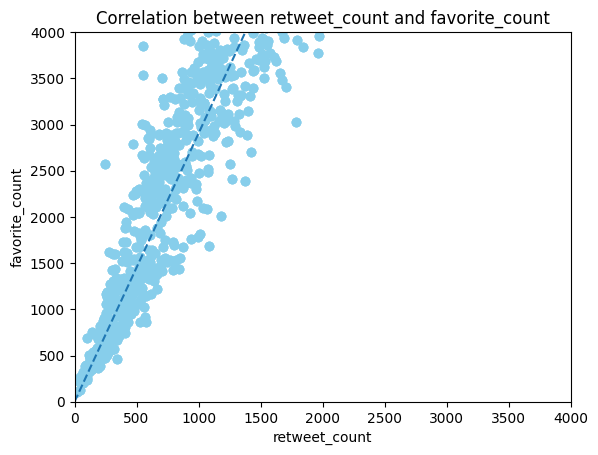

In [51]:
def rotate_point(x, y, angle):
    angle_rad = np.radians(angle)
    x_rot = x * np.cos(angle_rad) - y * np.sin(angle_rad)
    y_rot = x * np.sin(angle_rad) + y * np.cos(angle_rad)
    return x_rot, y_rot

x = np.array([0, 4000])
y = np.array([0, 4000])
angle = 26
x_rot, y_rot = rotate_point(x,y,angle)
plt.scatter(twitter_archive_master['retweet_count'], twitter_archive_master['favorite_count'], color='skyblue')
plt.plot(x_rot, y_rot, linestyle='--')
plt.title("Correlation between retweet_count and favorite_count")
plt.xlabel("retweet_count")
plt.ylabel("favorite_count")
plt.xlim(0,4000)
plt.ylim(0,4000)